<a href="https://colab.research.google.com/github/rakesh19889/Ai-task/blob/main/stock_price_perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [10]:
df.shape

(3019, 7)

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


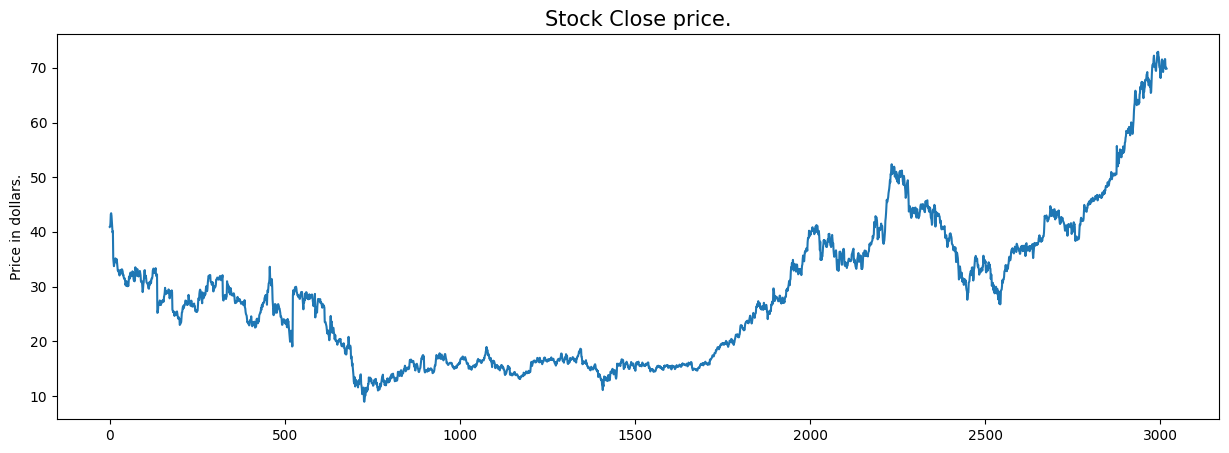

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Stock Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [14]:
df[df['Open'] == df['Close']].shape

(36, 7)

In [15]:
df = df.drop(['Close'], axis=1)

In [16]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Volume,0
Name,0


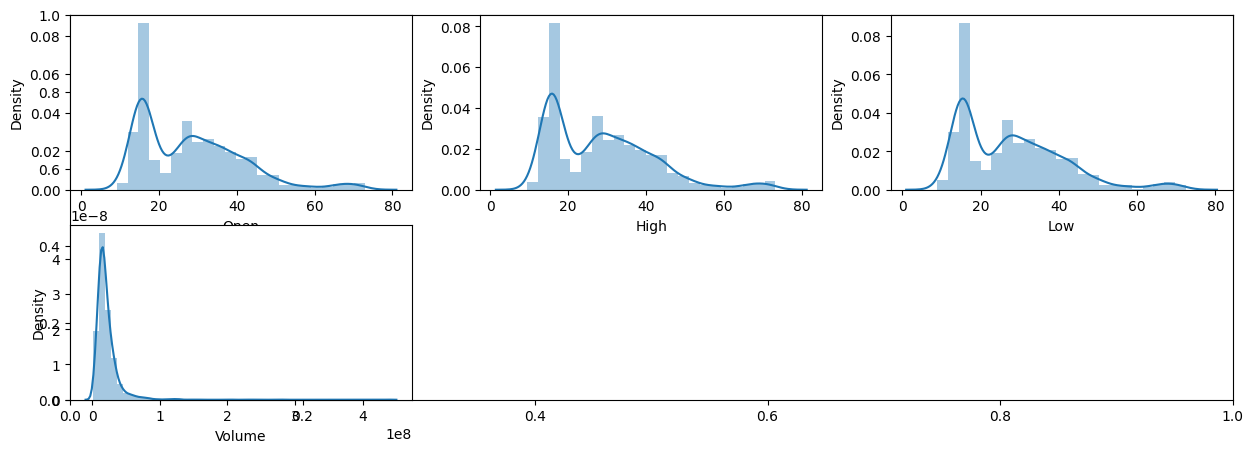

In [21]:
features = ['Open', 'High', 'Low', 'Volume']

plt.subplots(figsize=(15,5))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

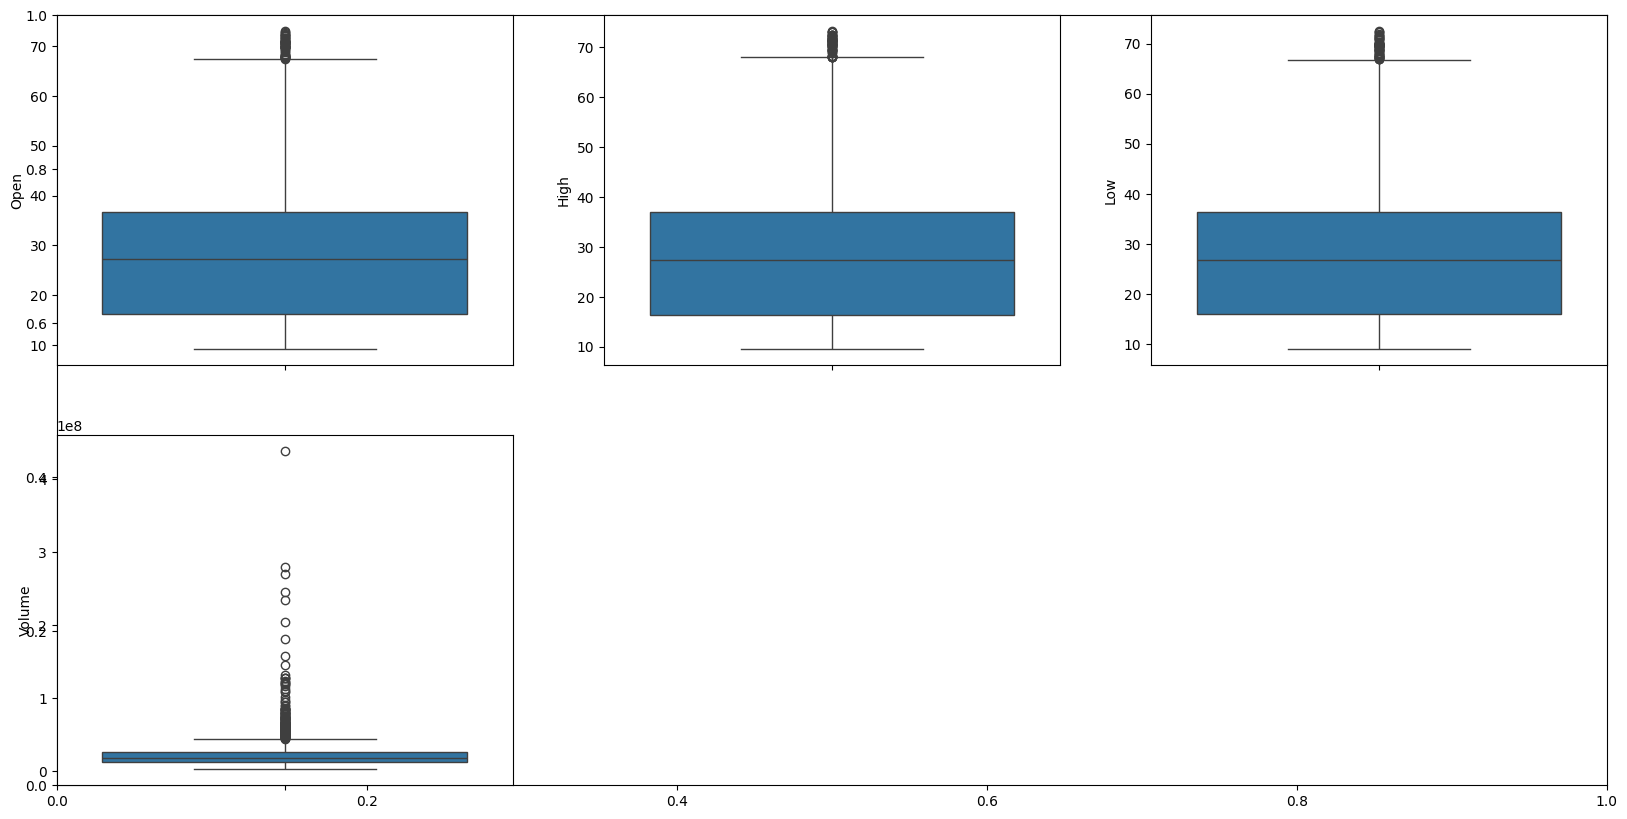

In [22]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [23]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Volume,Name,day,month,year
0,1/3/2006,39.69,41.22,38.79,24232729,AABA,3,1,2006
1,1/4/2006,41.22,41.90,40.77,20553479,AABA,4,1,2006
2,1/5/2006,40.93,41.73,40.85,12829610,AABA,5,1,2006
3,1/6/2006,42.88,43.57,42.80,29422828,AABA,6,1,2006
4,1/9/2006,43.10,43.66,42.82,16268338,AABA,9,1,2006


In [24]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Volume,Name,day,month,year,is_quarter_end
0,1/3/2006,39.69,41.22,38.79,24232729,AABA,3,1,2006,0
1,1/4/2006,41.22,41.90,40.77,20553479,AABA,4,1,2006,0
2,1/5/2006,40.93,41.73,40.85,12829610,AABA,5,1,2006,0
3,1/6/2006,42.88,43.57,42.80,29422828,AABA,6,1,2006,0
4,1/9/2006,43.10,43.66,42.82,16268338,AABA,9,1,2006,0
